In [42]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [43]:
df = pd.read_csv('synthetic_coffee_health_10000.csv')


In [44]:
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [46]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [47]:
df.describe(include='O')

,Gender,Country,Sleep_Quality,Stress_Level,Health_Issues,Occupation
count,10000,10000,10000,10000,4059,10000
unique,3,20,4,3,3,5
top,Female,Canada,Good,Low,Mild,Office
freq,5001,543,5637,6989,3579,2073


In [48]:
categorical =['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues','Occupation','Smoking',
       'Alcohol_Consumption']

numerical = ['Age', 'Coffee_Intake', 'Caffeine_mg','Sleep_Hours','BMI', 'Heart_Rate', 'Physical_Activity_Hours']

In [49]:
print(df['Smoking'].unique())


[0 1]


In [50]:
df['Smoking'] = df['Smoking'].map({0: 'No', 1: 'Yes'})
df['Alcohol_Consumption'] = df['Alcohol_Consumption'].map({0: 'no', 1: 'yes'})


df['Smoking']


,Smoking
0,No
1,No
2,No
3,No
4,No
...,...
9995,No
9996,No
9997,Yes
9998,No


In [51]:
df['Smoking'].unique()

array(['No', 'Yes'], dtype=object)

In [52]:
len(df.columns)

16

In [53]:
df.columns

Index(['ID', 'Age', 'Gender', 'Country', 'Coffee_Intake', 'Caffeine_mg',
       'Sleep_Hours', 'Sleep_Quality', 'BMI', 'Heart_Rate', 'Stress_Level',
       'Physical_Activity_Hours', 'Health_Issues', 'Occupation', 'Smoking',
       'Alcohol_Consumption'],
      dtype='object')

In [54]:
df.drop('ID', axis=1, inplace=True)


In [55]:
df['Health_Issues'].unique()

array([nan, 'Mild', 'Moderate', 'Severe'], dtype=object)

In [56]:
df.loc[df['Health_Issues'].isnull(), 'Health_Issues'] = "No Issue"


In [57]:
df['Health_Issues'].unique()

array(['No Issue', 'Mild', 'Moderate', 'Severe'], dtype=object)

In [58]:
df['Health_Issues']

,Health_Issues
0,No Issue
1,No Issue
2,Mild
3,Mild
4,Mild
...,...
9995,Moderate
9996,Mild
9997,No Issue
9998,No Issue


In [59]:
df.isnull().sum()

,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0
Stress_Level,0


In [60]:
df['Health_Issues'].value_counts(normalize="true")

,proportion
Health_Issues,
No Issue,0.5941
Mild,0.3579
Moderate,0.0463
Severe,0.0017


In [61]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df.Health_Issues)

df_mi = df[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
Health_Issues,0.830198
Sleep_Quality,0.385595
Stress_Level,0.385404
Country,0.004078
Occupation,0.000991
Gender,0.000315
Smoking,0.000208
Alcohol_Consumption,0.000127


In [62]:
mapping = {'No Issue': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3}
df['Health_Issues'] = df['Health_Issues'].map(mapping)


In [63]:
df[numerical].dtypes



,0
Age,int64
Coffee_Intake,float64
Caffeine_mg,float64
Sleep_Hours,float64
BMI,float64
Heart_Rate,int64
Physical_Activity_Hours,float64


In [64]:
df[numerical].corrwith(df['Health_Issues'])


,0
Age,0.291086
Coffee_Intake,0.107020
Caffeine_mg,0.107329
Sleep_Hours,-0.584061
BMI,0.206306
Heart_Rate,0.025014
Physical_Activity_Hours,-0.009893


In [65]:
df.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,0,Other,No,no
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,0,Service,No,no
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,1,Office,No,no
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,1,Other,No,no
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,1,Student,No,yes


In [66]:

feature_importance = {"Sleep_Hours", "Age", "BMI", "Sleep_Quality", "Stress_Level"}
categorical.remove("Health_Issues")
categorical

['Gender',
 'Country',
 'Sleep_Quality',
 'Stress_Level',
 'Occupation',
 'Smoking',
 'Alcohol_Consumption']

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

ohe = OneHotEncoder(drop='first')

transformer = make_column_transformer((ohe, categorical), remainder='passthrough',
                                     verbose_feature_names_out=False)

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_df.columns

Index(['Gender_Male', 'Gender_Other', 'Country_Belgium', 'Country_Brazil',
       'Country_Canada', 'Country_China', 'Country_Finland', 'Country_France',
       'Country_Germany', 'Country_India', 'Country_Italy', 'Country_Japan',
       'Country_Mexico', 'Country_Netherlands', 'Country_Norway',
       'Country_South Korea', 'Country_Spain', 'Country_Sweden',
       'Country_Switzerland', 'Country_UK', 'Country_USA',
       'Sleep_Quality_Fair', 'Sleep_Quality_Good', 'Sleep_Quality_Poor',
       'Stress_Level_Low', 'Stress_Level_Medium', 'Occupation_Office',
       'Occupation_Other', 'Occupation_Service', 'Occupation_Student',
       'Smoking_Yes', 'Alcohol_Consumption_yes', 'Age', 'Coffee_Intake',
       'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate',
       'Physical_Activity_Hours', 'Health_Issues'],
      dtype='object')

In [68]:
important_raw = ['Sleep_Quality', 'Stress_Level', 'Age', 'BMI','Sleep_Hours']

important_features = [col for col in transformed_df.columns
                      if any(col.startswith(feat) for feat in important_raw)]

X = transformed_df[important_features]
y = df['Health_Issues']
X

,Sleep_Quality_Fair,Sleep_Quality_Good,Sleep_Quality_Poor,Stress_Level_Low,Stress_Level_Medium,Age,Sleep_Hours,BMI
0,0.0,1.0,0.0,1.0,0.0,40.0,7.5,24.9
1,0.0,1.0,0.0,1.0,0.0,33.0,6.2,20.0
2,1.0,0.0,0.0,0.0,1.0,42.0,5.9,22.7
3,0.0,1.0,0.0,1.0,0.0,53.0,7.3,24.7
4,1.0,0.0,0.0,0.0,1.0,32.0,5.3,24.1
...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0,50.0,6.0,30.5
9996,1.0,0.0,0.0,0.0,1.0,18.0,5.8,19.1
9997,0.0,1.0,0.0,1.0,0.0,26.0,7.1,25.1
9998,0.0,1.0,0.0,1.0,0.0,40.0,7.0,19.3


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


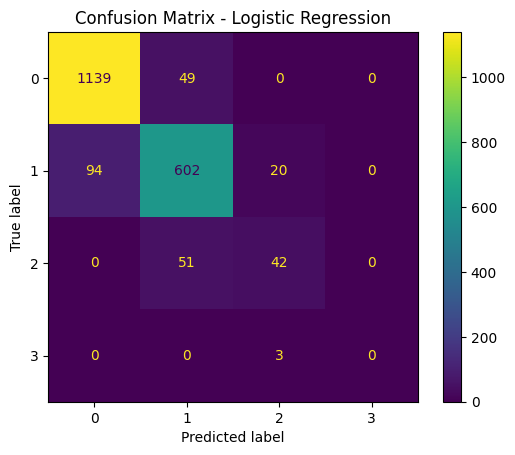

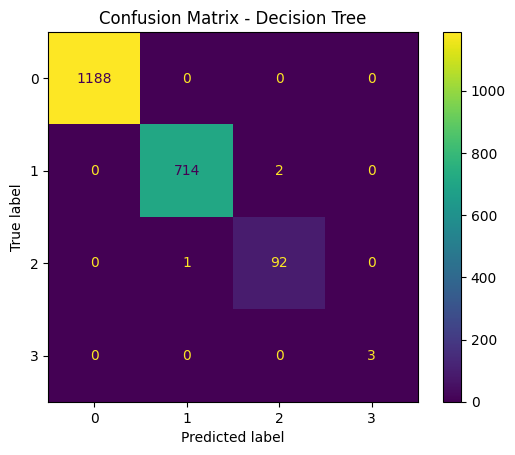

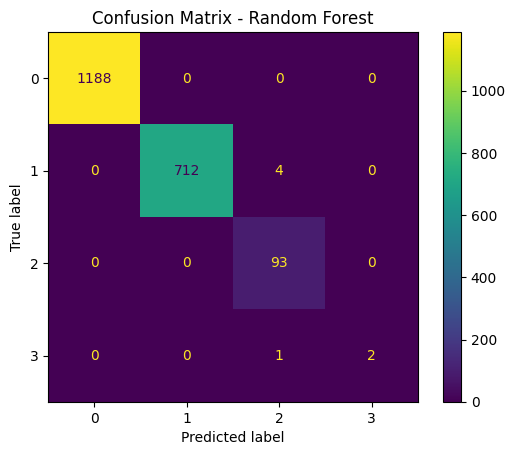

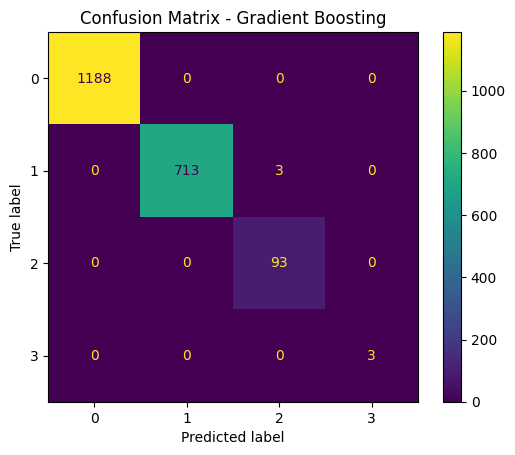

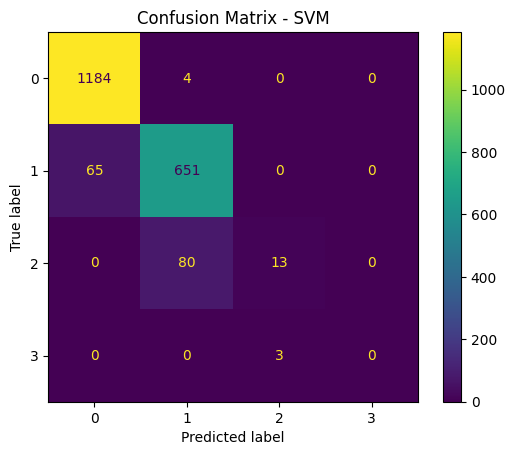

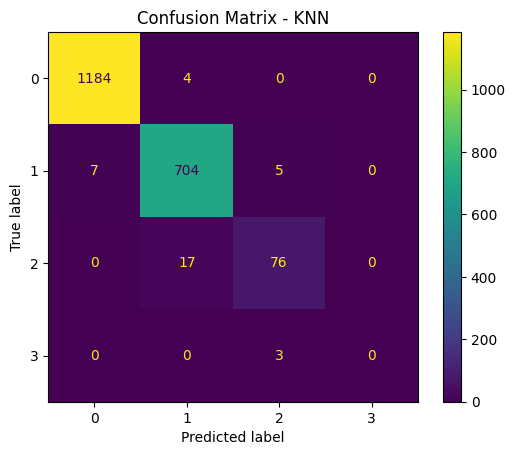

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    results.append([name, train_acc, test_acc])
    from sklearn.metrics import ConfusionMatrixDisplay

    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title("Confusion Matrix - " + name)
    plt.show()




In [70]:

df_results = pd.DataFrame(results, columns=["Model", "Train Accuracy", "Test Accuracy"])
print(df_results)

                 Model  Train Accuracy  Test Accuracy
0  Logistic Regression        0.898750         0.8915
1        Decision Tree        1.000000         0.9985
2        Random Forest        1.000000         0.9975
3    Gradient Boosting        1.000000         0.9985
4                  SVM        0.914625         0.9240
5                  KNN        0.992125         0.9820
